In [1]:
num_classes = 10 

# input image dimensions
img_rows, img_cols = 28, 28

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train.shape[0]

60000

In [6]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

input data에 존재하는 하나의 이미지의 shape을 변경해줘야 한다. (28x28) => (28x28x1)<br>

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
x_train[0].shape

(28, 28, 1)

In [9]:
x_train = x_train/255 # 0 ~ 1 사이의 값으로 normalization 하기
x_test = x_test.astype('float32')/255

In [10]:
y_train[0]

5

In [11]:
from tensorflow.keras.utils import to_categorical 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
print(y_train[0])
y_train_one_hot[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# strides=(1, 1)

Conv2D에 대한 자세한 내용은 https://keras.io/layers/convolutional/ 참고 
또는 https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# strides의 기본값 => pool_size

2x2 크기의 filter를 사용해서 Max pooling 수행

In [17]:
model.add(Flatten())

Flatten()은 3차원 형태의 데이터를 1차원 형태로 변경하는 작업을 수행

In [18]:
model.add(Dense(128, activation='relu'))

In [19]:
model.add(Dense(num_classes, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [21]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 16s 38ms/step - loss: 0.2648 - accuracy: 0.9204 - val_loss: 0.1133 - val_accuracy: 0.9660
Epoch 2/10
375/375 [==============================] - 15s 40ms/step - loss: 0.0784 - accuracy: 0.9765 - val_loss: 0.0695 - val_accuracy: 0.9791
Epoch 3/10
375/375 [==============================] - 15s 40ms/step - loss: 0.0508 - accuracy: 0.9852 - val_loss: 0.0601 - val_accuracy: 0.9819
Epoch 4/10
375/375 [==============================] - 15s 39ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0595 - val_accuracy: 0.9822
Epoch 5/10
375/375 [==============================] - 15s 39ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0550 - val_accuracy: 0.9848
Epoch 6/10
375/375 [==============================] - 15s 39ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0577 - val_accuracy: 0.9853
Epoch 7/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0538 - val_accuracy:

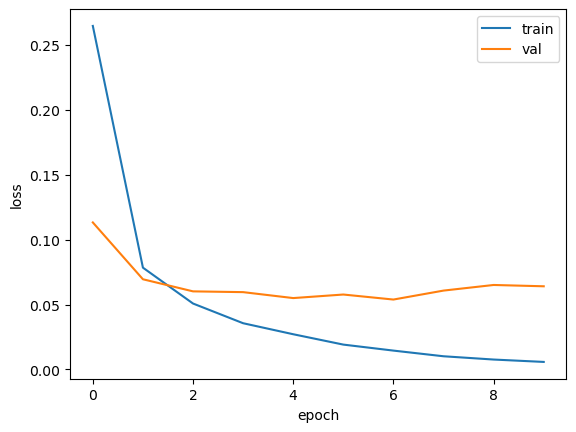

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

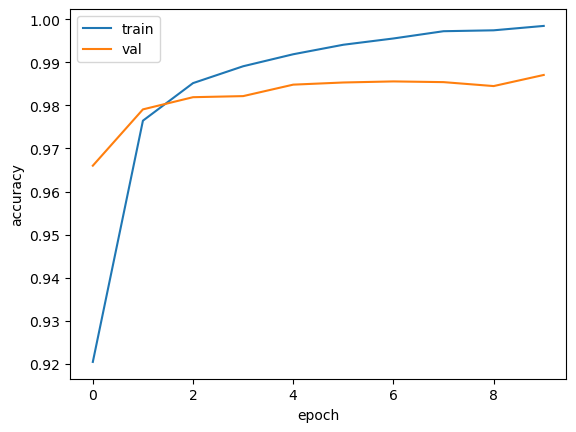

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0583 - accuracy: 0.9858
test_acc: 0.98580002784729


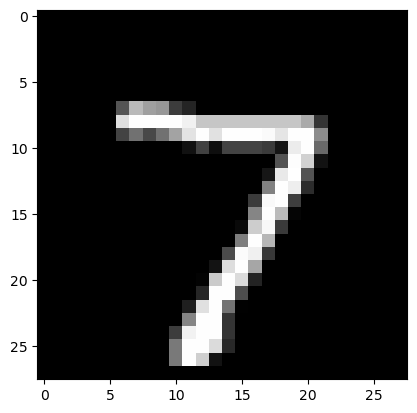

In [26]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [23]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1]) # 첫번째 이미지 in the test dataset

In [24]:
prediction

array([[0.0000000247, 0.000000044 , 0.0000006655, 0.0000137711,
        0.0000000002, 0.000000005 , 0.          , 0.9999769   ,
        0.0000001135, 0.000008487 ]], dtype=float32)

In [66]:
y_test[0]

7

In [68]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
print(labels[np.argmax(prediction)])

7
